In [1]:
import matplotlib.pyplot as plt
%matplotlib  inline
import pandas as pd
import numpy as np

import skimage as sk
from skimage import io

In [3]:
# initialize global variables
painting = False
points   = set()
modes    = ['idle','label','erase']
mode_idx = 0
mode     = modes[mode_idx]
labels   = [1,2,3,4]
current_label = labels[0]

label_colors = {
    1:(0,255,0),
    2:(0,0,255),
    3:(255,0,0),
    4:(255,125,0)
}

erase_color = (1,1,1)

In [4]:
s = set(((2,3,False),(2,3,True)))
s.add((2,3,True))
s.add((2,4,True));s

{(2, 3, False), (2, 3, True), (2, 4, True)}

In [5]:
# Convert set of 3-tuples to 3-column data frame
pd.DataFrame(np.asarray(list(s)), columns=['x','y','label'])

,x,y,label
0,2,4,1
1,2,3,1
2,2,3,0


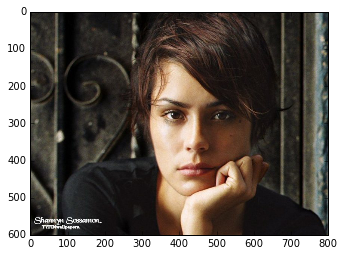

In [6]:
img = io.imread('./data/shannyn.jpg')
plt.imshow(img)

In [7]:
points = pd.read_csv('data/points.csv')

points.head()

,x,y,label
0,400,172,1
1,255,521,0
2,399,178,1
3,395,177,1
4,406,183,1


In [8]:
points.label.value_counts()

1    148
0    125
Name: label, dtype: int64

In [9]:
points[['r','g','b']] = points.apply(lambda row: img[row.y,row.x], axis=1)

In [10]:
points.groupby(['label']).mean().ix[:,['r','g','b']]

,r,g,b
label,,,
0,20.016000,16.016000,16.872000
1,227.493243,199.891892,167.277027


In [15]:
modes = ['idle','label','erase']
modes_idx = 0

In [16]:
modes[mode_idx]

'idle'

In [17]:
modes_idx += 1
modes[modes_idx % len(modes)]

'label'

In [18]:
labels = [1,2,3,4]

In [19]:
list(map(lambda s: ord(str(s)),labels))

[49, 50, 51, 52]

In [20]:
int(chr(49))

1

In [21]:
import cv2

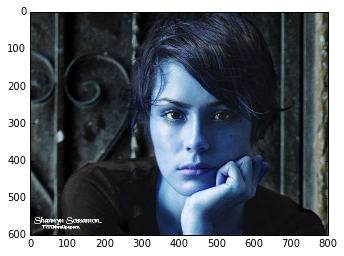

In [22]:
plt.imshow(img[...,::-1])

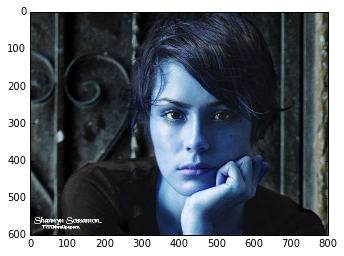

In [23]:
cv2_img = cv2.imread('./data/shannyn.jpg')
plt.imshow(cv2_img)

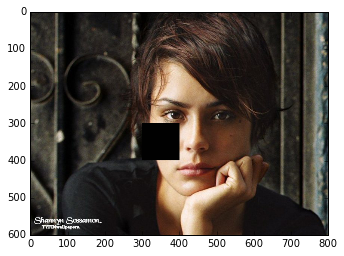

In [25]:
cpy = img.copy()

# cpy[150:200,350:400]  = label_colors[1]
# cpy[100:200,100:125]  = label_colors[2]
# cpy[450:500,200:300]  = label_colors[3]
cpy[300:400,300:400]  = erase_color

plt.imshow(cpy)

In [28]:
to_erase = np.where(np.all(cpy==erase_color, axis=-1))
xs = to_erase[0]
ys = to_erase[1]
to_erase = list(zip(xs,ys,))

In [31]:
cpy[xs,ys]

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       ..., 
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=uint8)

In [473]:
label_colors

{1: (0, 255, 0), 2: (0, 0, 255), 3: (255, 0, 0), 4: (255, 125, 0)}

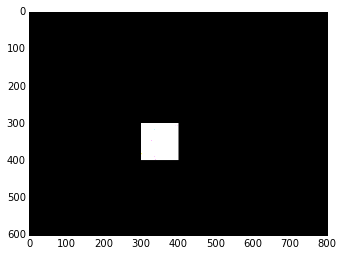

In [481]:
mask = np.where(cpy!=img,1,0)
plt.imshow(mask)

In [482]:
rows = slice(290,410)
cols = slice(290,410)

In [484]:
label_colors[4]

(255, 125, 0)

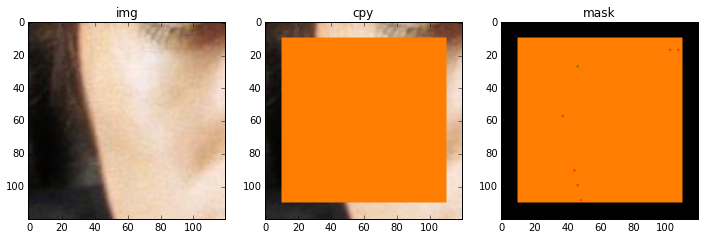

In [518]:
img = io.imread('./data/shannyn.jpg')
cpy = img.copy()
cpy[300:400,300:400]  = label_colors[4]
mask = np.where(cpy!=img,cpy,0)

fig, axes = plt.subplots(1,3, figsize=(12,4))

axes[0].imshow(img[rows,cols])
axes[0].set_title('img')

axes[1].imshow(cpy[rows,cols])
axes[1].set_title('cpy')

axes[2].imshow(mask[rows,cols])
axes[2].set_title('mask')

# for ax in axes:
#     ax.axis('off')

In [520]:
plt.imshow(np.where(np.all(cpy!=img, axis=-1),cpy,0))

ValueError: operands could not be broadcast together with shapes (600,800) (600,800,3) () 

In [513]:
tmp = cpy[303:313,390:400].copy()

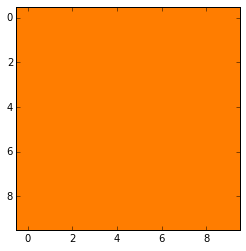

In [514]:
plt.imshow(tmp)

In [512]:
np.where(np.all(tmp==label_colors[4], axis=-1))

(array([], dtype=int64), array([], dtype=int64))

In [461]:
tmp = []

for label,color in label_colors.items():
    print(label, color)
    matches = np.where(np.all(mask==color,axis=-1))
    xs      = matches[0]
    ys      = matches[1]
    tmp.append(list(zip(xs,ys,[label]*len(xs))))

points = []

for sublist in tmp:
    points.extend(sublist)

np.asarray(points).shape

1 (0, 255, 0)
2 (0, 0, 255)
3 (255, 0, 0)
4 (255, 125, 0)


(9999, 3)

In [462]:
t = pd.DataFrame(points, columns=['x','y','label'])
t.sort_values(['x','y']).head()

,x,y,label
6,300,300,4
7,300,301,4
8,300,302,4
9,300,303,4
10,300,304,4


In [463]:
t.label.unique()

array([3, 4])

In [464]:
np.where(np.all(mask==label_colors[3],axis=-1))

(array([307, 307, 347, 380, 389, 398]), array([392, 397, 327, 334, 336, 338]))

In [465]:
df = pd.DataFrame(np.asarray(points), columns=['x','y','label']);
df.head()

,x,y,label
0,307,392,3
1,307,397,3
2,347,327,3
3,380,334,3
4,389,336,3


In [468]:
df[['b','g','r']] = df.apply(lambda row: img[row.y,row.x], axis=1)

In [469]:
print(df.groupby(['label']).mean().ix[:,['r','g','b']])

                r           g           b
label                                    
3      126.833333  144.333333  164.500000
4      136.883518  156.914640  180.704093


In [352]:
df = pd.read_csv('./df.csv')

In [357]:
img.shape

(600, 800, 3)

In [362]:
df[['b','g','r']] = df.apply(lambda row: img[row.x,row.y], axis=1)

In [364]:
df.head()

,x,y,label,b,g,r
0,456,763,1,129,142,140
1,457,760,1,111,130,137
2,457,761,1,111,130,135
3,457,762,1,110,125,127
4,457,763,1,125,138,136


In [365]:
img[456,763]

array([129, 142, 140], dtype=uint8)

In [42]:
ord(']')

93

In [43]:
[event for event in dir(cv2) if 'EVENT' in event]

['EVENT_FLAG_ALTKEY',
 'EVENT_FLAG_CTRLKEY',
 'EVENT_FLAG_LBUTTON',
 'EVENT_FLAG_MBUTTON',
 'EVENT_FLAG_RBUTTON',
 'EVENT_FLAG_SHIFTKEY',
 'EVENT_LBUTTONDBLCLK',
 'EVENT_LBUTTONDOWN',
 'EVENT_LBUTTONUP',
 'EVENT_MBUTTONDBLCLK',
 'EVENT_MBUTTONDOWN',
 'EVENT_MBUTTONUP',
 'EVENT_MOUSEHWHEEL',
 'EVENT_MOUSEMOVE',
 'EVENT_MOUSEWHEEL',
 'EVENT_RBUTTONDBLCLK',
 'EVENT_RBUTTONDOWN',
 'EVENT_RBUTTONUP']